# ADA Project : Dunnhumby dataset, Tell me what you buy and I will tell you who you are



## Abstract
We would like to analyse the Dunnhumby dataset. Living in a time and age where every piece of our data is stored and analysed; and being active consumers ourselves, we would like to see what informations retail chains can gather and infer about us knowing only our shopping habits. As transactions over two years of several households and their basic demographic profiles are provided, we want to see if there are any links and correlations between specific demographics (e.g. marital status, income, number of children, etc) and purchase patterns. Furthermore, if time permits it, we want to see if we can create a model predicting a consumer demographic profile from their shopping. Thus, we would like to see how "easy" and how precise it actually is for retailers to infer who their customer is by what they buy and target them with specific marketing. Basically, we want to know how much of a target we actually
are.

**Research questions:** 
- What are the main shopping trends that we can identify in this data ?
- Can we relate shopping trends to specific demographic parameters ?
- Can we predict some of these demographic parameters (age, marital statute etc) with knowing the household's habbits?
- In the opposite way, can we predict household consumption behaviour with knowing its characteristics?
- What accuracy in consumption prediction can the retailer obtain from a simple profile information?

## Task 1: Give an overview of the data as it stands

In [1]:
%matplotlib inline
import pandas as pd

import matplotlib.pyplot as plt
from pylab import *

import os
# to print numbers in a nice way
import locale
locale.setlocale(locale.LC_ALL, '')

'fr_CH.UTF-8'

In [2]:
os.getcwd()

'/Users/lou/Documents/Travail/master 2/ADA/epfl-ada-2019-project-bubble582/code'

In [3]:
'''As we said in the description of our project, we are going to concentrate on 3 of the 8 tables :
- hh_demographic.csv
- transaction_data.csv
- product.csv
In this first step, we want to load the data, and prepare it for the analysis'''

#load the data
hh_demographic = pd.read_csv('../data/dunnhumby_complete_csv/hh_demographic.csv', sep = ',')

transaction_data = pd.read_csv('../data/dunnhumby_complete_csv/transaction_data.csv', sep = ',')

product = pd.read_csv('../data/dunnhumby_complete_csv/product.csv', sep = ',')

### Task 1.A: What's actually in the dataset? 
This dataset contains household level transactions over two years from a group of 2,500 households who are frequent shoppers at a retailer. It contains all of each household’s purchases, not just those from a limited number of categories. For certain households, demographic information as well as direct marketing contact history are included. We have a look at a few samples from each table: 

#### **A. Transaction data:**
Dataset of all products purchased by households during the study. Each line in the table is what could essentially be found in a store reciept. The attributes of the dataset are the following: 

- HOUSEHOLD_KEY: identifies each household, 
- BASKET_ID: identifies a purchase occasion, 
- DAY: day when transaction occured
- PRODUCT_ID: identifies each product, 
- QUANTITY: Number of products purchased during trip
- SALES_VALUE: Amount of dollars retailer recieves from sale
- STORE_ID: identifies store, 
- COUPON_MATCH_DISC: discount applied du to retailer's match of manufacturer coupon
- COUPON_DISC: discount applied due to manufacturer coupon
- RETAIL_DISC: discount applied due to retailer's loyalty card program
- TRANS_TIME: time of day when transaction occured
- WEEK_NO: week of the transaction. Ranges from 1-102. 

In [4]:
transaction_data['STORE_ID'].is_unique

False

In [5]:
transaction_data.head(4)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.0,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.3,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.0,1631,1,0.0,0.0


**Q1: How many transactions occured during the two years?**

In [6]:
print(f"In total there were {transaction_data.count()['household_key']:n} transactions during the two years.")

In total there were 2595732 transactions during the two years.


**Q2: How many purchase occasions occured during the two years?** <br>
Attention : here transactions are not what we usually think of. It's like on a reciept so the number of total unique purchases is not the number of transactions but the total of unique basket_id. 

In [7]:
print(f"In total there were {len(transaction_data['BASKET_ID'].unique()):n} purchase occasions during the two years.")

In total there were 276484 purchase occasions during the two years.


**Q3: How many households are represented in the transactions?**

In [8]:
print(f"In total {len(transaction_data['household_key'].unique()):n} households made at least one transaction during the two years.")

In total 2500 households made at least one transaction during the two years.


#### **B. Demographic data:**
Demographic info for a certain portion of households. Contains only the data for 801 households of 2500 though. The rest could not be aquiered. The attributes of the dataset are the following: 
 
- HOUSEHOLD_KEY : identifies each household, **unique**
- AGE_DES: estimated age range
- MARITAL_STATUS_CODE: A (Married), B (Single), C (Unknown)
- INCOME_DESC : Household income
- HOMEOWNER_DESC: Homeowner, renter, etc
- HH_COMP_DEC: Household composition
- HOUSEHOLD_SIZE_DESC: Size of household up to 5+ 
- KID_CATEGORY_DESC: Number of children present up to 3+ 

In [9]:
hh_demographic['household_key'].is_unique

True

In [10]:
hh_demographic.head(4)

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13


**Q3: How many age categories are there ? And what are they ?**


In [11]:
print(f"In total there are {len(hh_demographic['AGE_DESC'].unique()):n} age categories")
print("The different categories are:", hh_demographic['AGE_DESC'].unique())

In total there are 6 age categories
The different categories are: ['65+' '45-54' '25-34' '35-44' '19-24' '55-64']


**Q4: How many income categories are there ? And what are they ?**

In [12]:
print(f"In total there are {len(hh_demographic['INCOME_DESC'].unique()):n} income categories")
print("The different categories are:", hh_demographic['INCOME_DESC'].unique())

In total there are 12 income categories
The different categories are: ['35-49K' '50-74K' '25-34K' '75-99K' 'Under 15K' '100-124K' '15-24K'
 '125-149K' '150-174K' '250K+' '175-199K' '200-249K']


**Q5: How many homeowner categories are there ? And what are they ?**

In [13]:
print("In total there are %d homeowner categories" %len(hh_demographic['HOMEOWNER_DESC'].unique()))
print("The different categories are:", hh_demographic['HOMEOWNER_DESC'].unique())

In total there are 5 homeowner categories
The different categories are: ['Homeowner' 'Unknown' 'Renter' 'Probable Renter' 'Probable Owner']


**Q7: How many household composition categories are there ? And what are they ?**

In [14]:
print(f"In total there are {len(hh_demographic['HH_COMP_DESC'].unique()):n} household composition categories")
print("The different categories are:", hh_demographic['HH_COMP_DESC'].unique())

In total there are 6 household composition categories
The different categories are: ['2 Adults No Kids' '2 Adults Kids' 'Single Female' 'Unknown'
 'Single Male' '1 Adult Kids']


**Q8: How many household size categories are there ? And what are they ?**

In [15]:
print(f"In total there are {len(hh_demographic['HOUSEHOLD_SIZE_DESC'].unique()):n} household size categories")
print("The different categories are:", hh_demographic['HOUSEHOLD_SIZE_DESC'].unique())

In total there are 5 household size categories
The different categories are: ['2' '3' '4' '1' '5+']


**Q9: How many kid number categories are there ? And what are they ?**

In [16]:
print(f"In total there are {len(hh_demographic['KID_CATEGORY_DESC'].unique()):n} kid number categories")
print("The different categories are:", hh_demographic['KID_CATEGORY_DESC'].unique())

In total there are 4 kid number categories
The different categories are: ['None/Unknown' '1' '2' '3+']


**Q10: Do household composition, household size, kid category match with each other?**

In [17]:
for hh_composition in hh_demographic['HH_COMP_DESC'].unique():
    print("Looking at the household composition:", hh_composition)
    hh_demographic_current_composition = hh_demographic[hh_demographic['HH_COMP_DESC'] == hh_composition]
    print("Household size unique information:", hh_demographic_current_composition['HOUSEHOLD_SIZE_DESC'].unique())
    print("Kid number unique information:", hh_demographic_current_composition['KID_CATEGORY_DESC'].unique())
    print()

Looking at the household composition: 2 Adults No Kids
Household size unique information: ['2']
Kid number unique information: ['None/Unknown']

Looking at the household composition: 2 Adults Kids
Household size unique information: ['3' '4' '5+']
Kid number unique information: ['1' '2' '3+']

Looking at the household composition: Single Female
Household size unique information: ['1' '2']
Kid number unique information: ['None/Unknown']

Looking at the household composition: Unknown
Household size unique information: ['1' '3' '2' '5+']
Kid number unique information: ['None/Unknown' '1' '3+']

Looking at the household composition: Single Male
Household size unique information: ['1' '2']
Kid number unique information: ['None/Unknown']

Looking at the household composition: 1 Adult Kids
Household size unique information: ['2' '3' '5+' '4']
Kid number unique information: ['1' '2' '3+']



The household category 2 Adults No Kids makes sense for each entry.
The categories Single Female and Single Male have come inconsistencies along the dataset. Both of them should have the household size to 1, but there are some entries with size to 2. Why? <br>
Let's now investigate the three remaining categories. For example for 2 Adults Kids we expect the household size to be 3 if the number of kids is 1, etc.

In [18]:
hh_composition = "2 Adults Kids"
hh_demographic_current_composition = hh_demographic[hh_demographic['HH_COMP_DESC'] == hh_composition]
for household_size in hh_demographic_current_composition['HOUSEHOLD_SIZE_DESC'].unique():
    tmp = hh_demographic_current_composition[hh_demographic_current_composition['HOUSEHOLD_SIZE_DESC'] == household_size]
    print(f"For house hold size {household_size}, with 2 adults, there are", tmp['KID_CATEGORY_DESC'].unique(), "kid categories")
print()
hh_composition = "1 Adult Kids"
hh_demographic_current_composition = hh_demographic[hh_demographic['HH_COMP_DESC'] == hh_composition]
for household_size in hh_demographic_current_composition['HOUSEHOLD_SIZE_DESC'].unique():
    tmp = hh_demographic_current_composition[hh_demographic_current_composition['HOUSEHOLD_SIZE_DESC'] == household_size]
    print(f"For house hold size {household_size}, with 1 adult, there are", tmp['KID_CATEGORY_DESC'].unique(), "kid categories")

For house hold size 3, with 2 adults, there are ['1'] kid categories
For house hold size 4, with 2 adults, there are ['2'] kid categories
For house hold size 5+, with 2 adults, there are ['3+'] kid categories

For house hold size 2, with 1 adult, there are ['1'] kid categories
For house hold size 3, with 1 adult, there are ['2' '1'] kid categories
For house hold size 5+, with 1 adult, there are ['3+'] kid categories
For house hold size 4, with 1 adult, there are ['2' '3+'] kid categories


We can see that there are some inconsistencies. We fix them in the notebook fixing_household_composition.ipynb

**Q11: How many marital status categories are there? And what are they?**

In [19]:
print("In total there are %d marital status categories" %len(hh_demographic['MARITAL_STATUS_CODE'].unique()))
print("The different categories are:", hh_demographic['MARITAL_STATUS_CODE'].unique())

In total there are 3 marital status categories
The different categories are: ['A' 'U' 'B']


For the marital status, the categories are not obvious:
- 'A' = 'married'
- 'B' = 'Single'
- 'U' = 'Unknown'

**Q11: How many households are there?**

In [20]:
print(f"In total there are {hh_demographic.count()['household_key']:n} households for which we have the demographic data.")

In total there are 801 households for which we have the demographic data.


**Note for the bubble group :**

**Should we keep in the transaction data only the households for which we have the demographic data?? could be interesting considering the fact that we want to get insights on the shopping behavior according to the demographic data**

#### **C. Product data:**
Information on each product sold such as type of product, national or private label and a brand identifier. The attributes of the dataset are the following: 
- PRODUCT_ID: **unique**, identifies product
- DEPARMENT: groups similar products together
- COMMODITY_DESC: groups similar products together at a lower level
- SUB_COMMODITY_DESC: groups similar products together at the lowest level. 
- MANUFACTURER: code that links products with the same manufacturer together 
- BRAND: indicates private or national label brand
- CURR_SIZE_OF_PRODUCT: indicates package size (not available for all) 

Let's have a look: 

In [21]:
product.head(4)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ


**Q10: How many products are there ?**

In [22]:
# Are the products IDs unique ?
product['PRODUCT_ID'].is_unique

True

In [23]:
print("In total there are "+ f"{product.count()['PRODUCT_ID']:,d}" +" products")

In total there are 92,353 products


**Q11: How many department categories are there ? And what are they ?**

In [24]:
print("In total there are "+ f"{len(product['DEPARTMENT'].unique()) :,d}"+ " department categories" )
print("The different categories are:", product['DEPARTMENT'].unique())

In total there are 44 department categories
The different categories are: ['GROCERY' 'MISC. TRANS.' 'PASTRY' 'DRUG GM' 'MEAT-PCKGD' 'SEAFOOD-PCKGD'
 'PRODUCE' 'NUTRITION' 'DELI' 'COSMETICS' 'MEAT' 'FLORAL'
 'TRAVEL & LEISUR' 'SEAFOOD' 'MISC SALES TRAN' 'SALAD BAR' 'KIOSK-GAS'
 'ELECT &PLUMBING' 'GRO BAKERY' 'GM MERCH EXP' 'FROZEN GROCERY'
 'COUP/STR & MFG' 'SPIRITS' 'GARDEN CENTER' 'TOYS' 'CHARITABLE CONT'
 'RESTAURANT' 'RX' 'PROD-WHS SALES' 'MEAT-WHSE' 'DAIRY DELI' 'CHEF SHOPPE'
 'HBC' 'DELI/SNACK BAR' 'PORK' 'AUTOMOTIVE' 'VIDEO RENTAL' ' '
 'CNTRL/STORE SUP' 'HOUSEWARES' 'POSTAL CENTER' 'PHOTO' 'VIDEO'
 'PHARMACY SUPPLY']


**Q12: Are all produts in the product dataset represented in transactions ?**
There are 92 353 products. As for the households, we can investigate whether all the products are represented in the *transaction_data* table.

In [25]:
print("There are "+ f"{len(transaction_data['PRODUCT_ID'].unique()):,d}" +" products in the transactions table" )

There are 92,339 products in the transactions table


There are 92 339 products represented in the *transaction_data* table, meaning that only **14** are not represented. We can more easily imagine to do an inner join, and just drop those 14 products. 

**Q13: Which are these 14 products that are never sold ?**

### TASK 1.B: Simple plots

#### A. HH-demographic

In [26]:
hh_demographic.head(4)

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13


For now, the categories in this data frame are not arranged in a meaninful way, meaning that if we would make some plots now, we would not have the age categories ranged in ascending or descending order for example. 
Thus, we first want to arrange them, before making some exploratory plots.

In [27]:
ordered_age= ['19-24','25-34','35-44','45-54','55-64', '65+' ]

hh_demographic['AGE_DESC'] = pd.Categorical(hh_demographic['AGE_DESC'],
                      ordered = True,
                      categories = ordered_age)

print ('The order of the age categories is :', ordered_age)

The order of the age categories is : ['19-24', '25-34', '35-44', '45-54', '55-64', '65+']


In [28]:
ordered_income= ['Under 15K','15-24K','25-34K','35-49K','50-74K','75-99K','100-124K',
                 '125-149K','150-174K','175-199K','200-249K','250K+']

hh_demographic['INCOME_DESC'] = pd.Categorical(hh_demographic['INCOME_DESC'],
                      ordered = True,
                      categories = ordered_income)

print ('The order of the income categories is :', ordered_income)

The order of the income categories is : ['Under 15K', '15-24K', '25-34K', '35-49K', '50-74K', '75-99K', '100-124K', '125-149K', '150-174K', '175-199K', '200-249K', '250K+']


In [29]:
ordered_homeowner= ['Unknown','Probable Renter','Renter','Probable Owner','Homeowner']

hh_demographic['HOMEOWNER_DESC'] = pd.Categorical(hh_demographic['HOMEOWNER_DESC'],
                      ordered = True,
                      categories = ordered_homeowner)

print ('The order of the homeowner categories is :', ordered_homeowner)

The order of the homeowner categories is : ['Unknown', 'Probable Renter', 'Renter', 'Probable Owner', 'Homeowner']


In [30]:
ordered_hh_comp= ['Unknown','Single Female','Single Male','1 Adult Kids','2 Adults No Kids','2 Adults Kids']

hh_demographic['HH_COMP_DESC'] = pd.Categorical(hh_demographic['HH_COMP_DESC'],
                      ordered = True,
                      categories = ordered_hh_comp)

print ('The order of the household composition categories is :', ordered_hh_comp)

The order of the household composition categories is : ['Unknown', 'Single Female', 'Single Male', '1 Adult Kids', '2 Adults No Kids', '2 Adults Kids']


In [31]:
ordered_hh_size= ['1','2','3','4','5+']

hh_demographic['HOUSEHOLD_SIZE_DESC'] = pd.Categorical(hh_demographic['HOUSEHOLD_SIZE_DESC'],
                      ordered = True,
                      categories = ordered_hh_size)

print ('The order of the household size categories is :', ordered_hh_size)

The order of the household size categories is : ['1', '2', '3', '4', '5+']


In [32]:
ordered_kid_number= ['None/Unknown','1','2','3+']

hh_demographic['KID_CATEGORY_DESC'] = pd.Categorical(hh_demographic['KID_CATEGORY_DESC'],
                      ordered = True,
                      categories = ordered_kid_number)

print ('The order of the kid number categories is :', ordered_kid_number)

The order of the kid number categories is : ['None/Unknown', '1', '2', '3+']


In [33]:
ordered_marital_status= ['A','B','U']

hh_demographic['MARITAL_STATUS_CODE'] = pd.Categorical(hh_demographic['MARITAL_STATUS_CODE'],
                      ordered = True,
                      categories = ordered_marital_status)

print ('The order of the marital status categories is :', ordered_marital_status)

The order of the marital status categories is : ['A', 'B', 'U']


Now that all the categories in this data frame are ranged in a meaningful way, let's make some simple plots to have an idea of the characteristics of the population which we study.

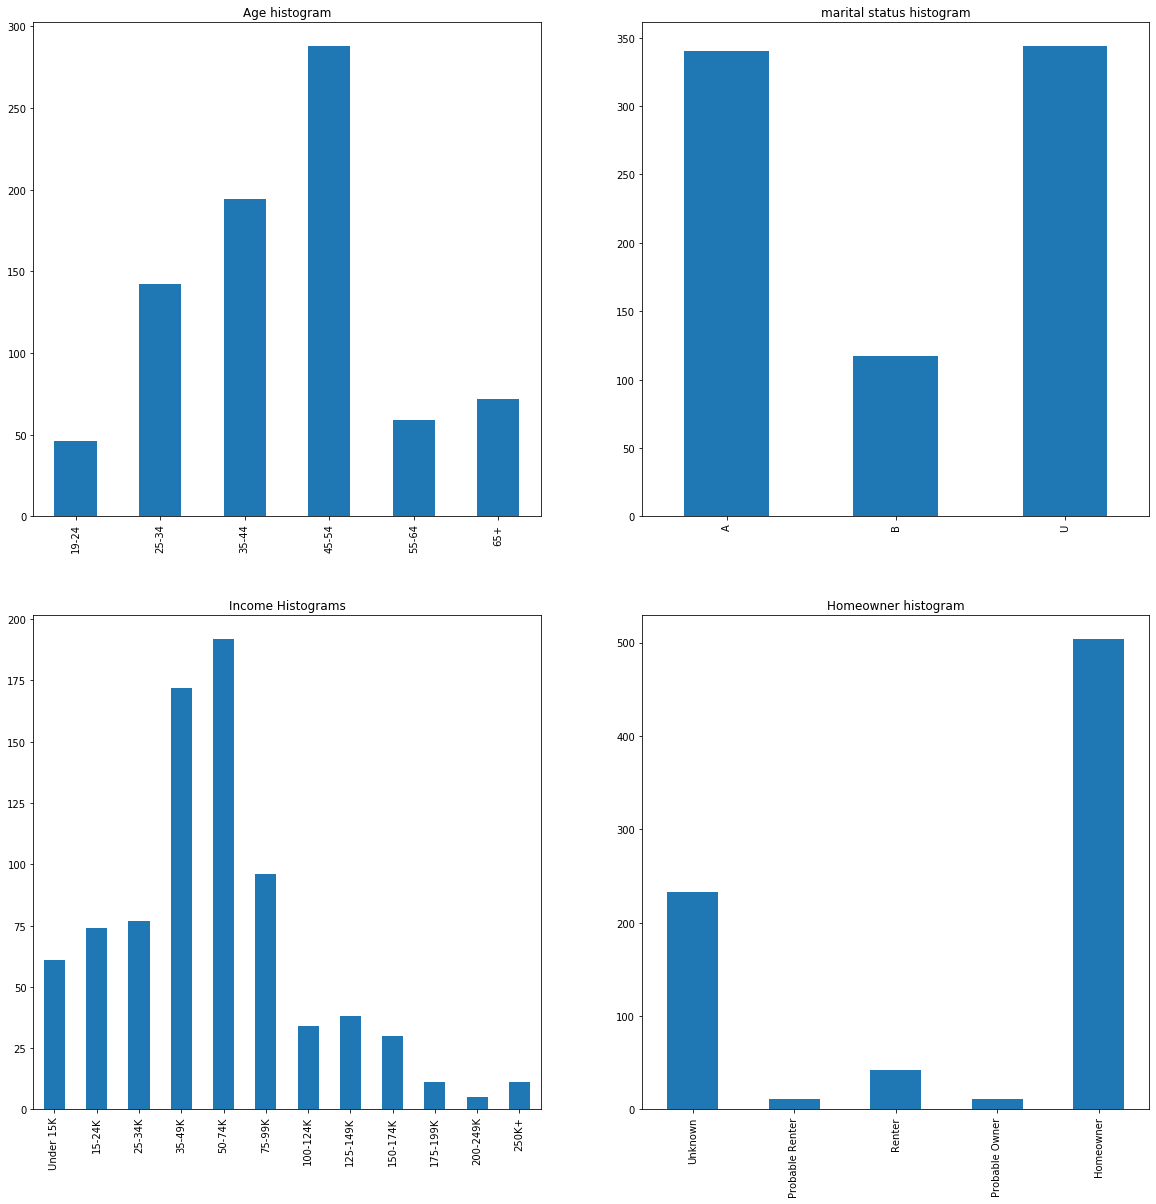

In [34]:
fig1 = plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
hh_demographic['AGE_DESC'].value_counts(sort = False).plot(kind = 'bar', title = 'Age histogram')

plt.subplot(2, 2, 2)
hh_demographic['MARITAL_STATUS_CODE'].value_counts(sort = False).plot(kind='bar', title = 'marital status histogram')

plt.subplot(2,2,3)
hh_demographic['INCOME_DESC'].value_counts(sort = False).plot(kind='bar', title = 'Income Histograms')

plt.subplot(2,2,4)
hh_demographic['HOMEOWNER_DESC'].value_counts(sort = False).plot(kind='bar', title = 'Homeowner histogram')

plt.show()

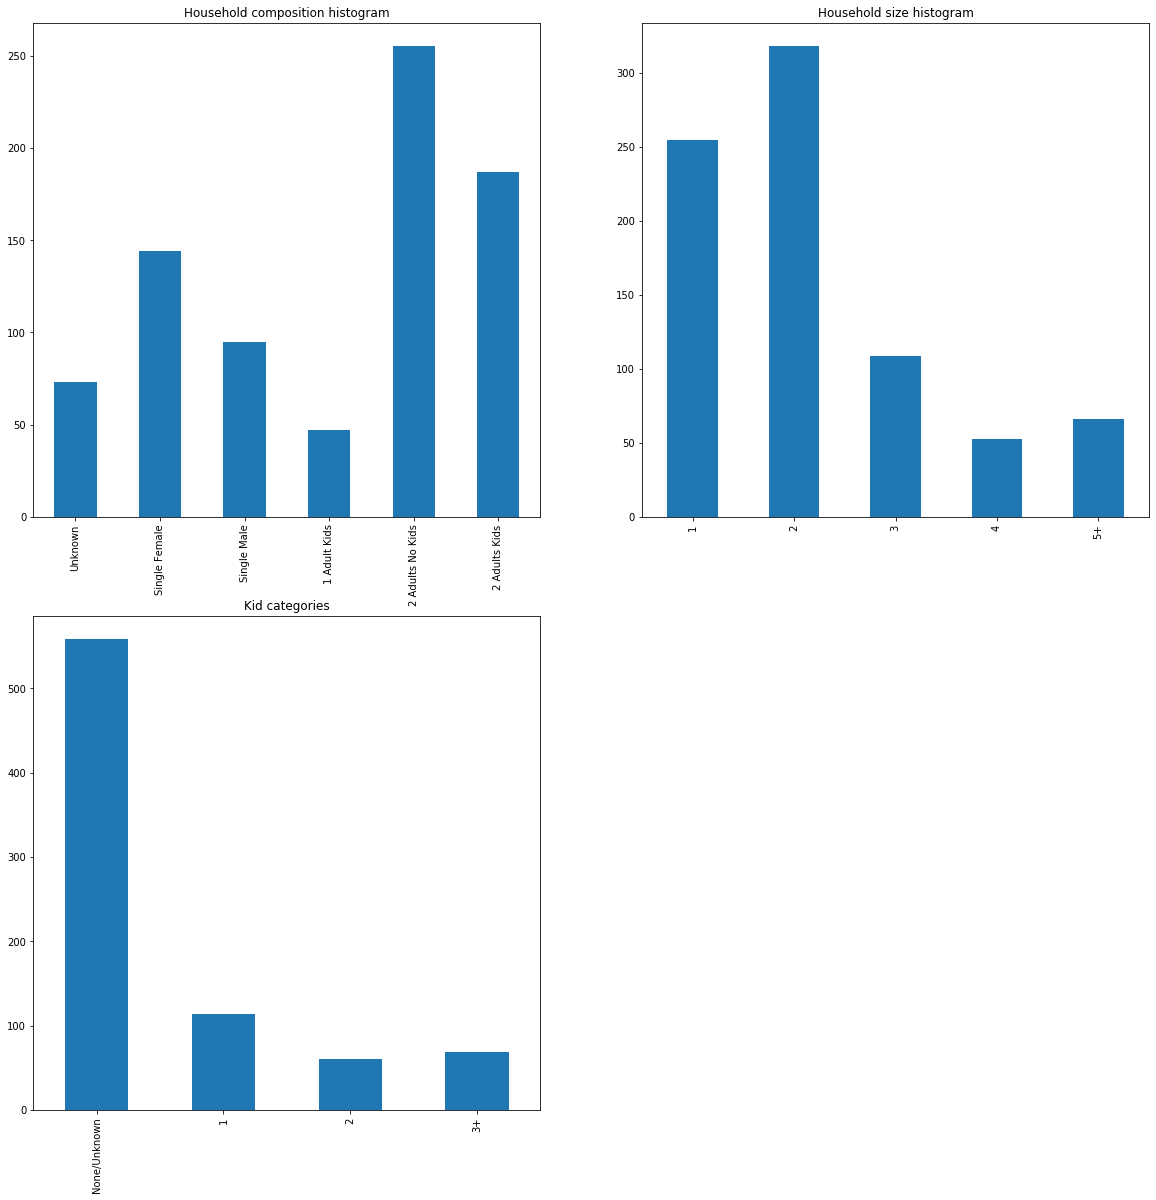

In [35]:
fig2 = plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
hh_demographic['HH_COMP_DESC'].value_counts(sort = False).plot(kind='bar', title = 'Household composition histogram')

plt.subplot(2,2,2)
hh_demographic['HOUSEHOLD_SIZE_DESC'].value_counts(sort = False).plot(kind='bar', title = 'Household size histogram')

plt.subplot(2,2,3)
hh_demographic['KID_CATEGORY_DESC'].value_counts(sort = False).plot(kind='bar', title = 'Kid categories')

plt.show()

**B.Product data**<br/>
We reproduce the ordering step for the product table

In [36]:
product.head(4)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ


In [37]:
ordered_manufacturer= product.MANUFACTURER.astype(int).sort_values()
ordered_manufacturer= ordered_manufacturer.unique()

product['MANUFACTURER'] = pd.Categorical(product['MANUFACTURER'],
                      ordered = True,
                      categories = ordered_manufacturer)

print ('The order of the manufacturer categories is :', ordered_manufacturer)

The order of the manufacturer categories is : [   1    2    3 ... 6475 6476 6477]


In [38]:
ordered_department= ['GROCERY','FROZEN GROCERY','GRO BAKERY','PASTRY',
        'SEAFOOD','SEAFOOD-PCKGD','MEAT', 'MEAT-PCKGD','MEAT-WHSE','PORK','SPIRITS','NUTRITION',
       'PRODUCE','CHEF SHOPPE','RESTAURANT','SALAD BAR','DELI', 'DAIRY DELI','DELI/SNACK BAR',
    'DRUG GM','COSMETICS','PHARMACY SUPPLY','GARDEN CENTER','FLORAL', 'TRAVEL & LEISUR', 
    'POSTAL CENTER', 'PHOTO', 'VIDEO','VIDEO RENTAL','TOYS','HOUSEWARES', 
    'KIOSK-GAS', 'ELECT &PLUMBING','AUTOMOTIVE','GM MERCH EXP','COUP/STR & MFG', 
     'CHARITABLE CONT', 'RX','PROD-WHS SALES', 'HBC','CNTRL/STORE SUP','MISC. TRANS.', 'MISC SALES TRAN',' ']

product['DEPARTMENT'] = pd.Categorical(product['DEPARTMENT'],
                      ordered = True,
                      categories = ordered_department)

print ('The order of the department categories is :', ordered_department)

The order of the department categories is : ['GROCERY', 'FROZEN GROCERY', 'GRO BAKERY', 'PASTRY', 'SEAFOOD', 'SEAFOOD-PCKGD', 'MEAT', 'MEAT-PCKGD', 'MEAT-WHSE', 'PORK', 'SPIRITS', 'NUTRITION', 'PRODUCE', 'CHEF SHOPPE', 'RESTAURANT', 'SALAD BAR', 'DELI', 'DAIRY DELI', 'DELI/SNACK BAR', 'DRUG GM', 'COSMETICS', 'PHARMACY SUPPLY', 'GARDEN CENTER', 'FLORAL', 'TRAVEL & LEISUR', 'POSTAL CENTER', 'PHOTO', 'VIDEO', 'VIDEO RENTAL', 'TOYS', 'HOUSEWARES', 'KIOSK-GAS', 'ELECT &PLUMBING', 'AUTOMOTIVE', 'GM MERCH EXP', 'COUP/STR & MFG', 'CHARITABLE CONT', 'RX', 'PROD-WHS SALES', 'HBC', 'CNTRL/STORE SUP', 'MISC. TRANS.', 'MISC SALES TRAN', ' ']


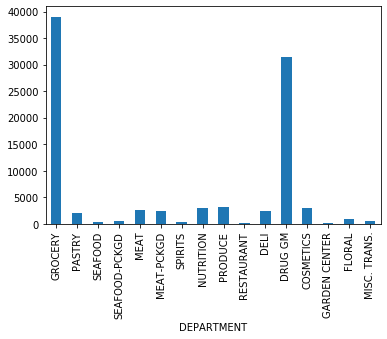

In [39]:
department= product.groupby(['DEPARTMENT']).count()
department[department.BRAND>100].BRAND.plot.bar()


In [40]:
# if we ever want to use 
Unit=product.CURR_SIZE_OF_PRODUCT.str.extract('([A-Z]\w{0,})',expand = False)
Measure=product.CURR_SIZE_OF_PRODUCT.str.extract('(\d+)',expand = False)

In [41]:
product.COMMODITY_DESC.unique()

array(['FRZN ICE', 'NO COMMODITY DESCRIPTION', 'BREAD',
       'FRUIT - SHELF STABLE', 'COOKIES/CONES', 'SPICES & EXTRACTS',
       'VITAMINS', 'BREAKFAST SWEETS', 'PNT BTR/JELLY/JAMS',
       'ICE CREAM/MILK/SHERBTS', 'MAGAZINE', 'AIR CARE', 'CHEESE',
       'SHORTENING/OIL', 'COFFEE', 'DIETARY AID PRODUCTS',
       'PAPER HOUSEWARES', 'BAKED BREAD/BUNS/ROLLS',
       'VEGETABLES - SHELF STABLE', 'HISPANIC', 'DINNER MXS:DRY',
       'CONDIMENTS/SAUCES', 'FRZN VEGETABLE/VEG DSH', 'BAKING NEEDS',
       'DINNER SAUSAGE', 'FRZN FRUITS', 'SEAFOOD - FROZEN',
       'HOUSEHOLD CLEANG NEEDS', 'FD WRAPS/BAGS/TRSH BG',
       'DRY MIX DESSERTS', 'PICKLE/RELISH/PKLD VEG', 'CAKES',
       'BAKING MIXES', 'POTATOES', 'FLUID MILK PRODUCTS', 'SOUP',
       'BAKED SWEET GOODS', 'COOKIES', 'DRY BN/VEG/POTATO/RICE',
       'FACIAL TISS/DNR NAPKIN', 'FROZEN PIZZA', 'EGGS',
       'REFRGRATD DOUGH PRODUCTS', 'HOT CEREAL', 'COLD CEREAL',
       'SUGARS/SWEETNERS', 'SEAFOOD - SHELF STABLE', 'POPCORN',
   

## Task 2: Give an overview of the data after clean-up

### Task 2.A: How the data was cleaned-up?
We preprocessed the three datasets (hh_demographic, products and transaction_story) in three other notebooks accessible in our repository. We end up we 3 clean-up csv files that we are loading here. In addidtion to that the products were also labelled, in order to create categories. These categories will allow us to match demographic features with consumption habbits.

In [42]:
import re
import seaborn as sns

#load the new datasets

#run the fix_household_composition notebook and save the final dataframe as hh_demographic_fxd
hh_demographic_fxd = pd.read_csv('../data/hh_demographic_fxd.csv', sep = ',')

#run the product notebook and save the final dataframe product as products_labelled
products_labelled = pd.read_csv('../data/products_labelled.csv', sep = ',')

To compute correlations in between the demographic data we need to put text into numerical data. For ranges of number (as for the ages for example) we choose to use the mean of the range to represent these data. For qualitative data (for marital status for example) we give a number that represent the "strength" of the status. For example being an owner is stronger than being a renter.

In [43]:
hh_demographic4corr = hh_demographic_fxd
hh_demographic4corr.loc[hh_demographic4corr['MARITAL_STATUS_CODE'] == 'M', 'MARITAL_STATUS_CODE'] = 1
hh_demographic4corr.loc[hh_demographic4corr['MARITAL_STATUS_CODE'] == 'S', 'MARITAL_STATUS_CODE'] = 0

hh_demographic4corr.loc[hh_demographic4corr['AGE_DESC'] == '65+', 'AGE_DESC'] = 65
hh_demographic4corr.loc[hh_demographic4corr['AGE_DESC'] == '45-54', 'AGE_DESC'] = 59.5
hh_demographic4corr.loc[hh_demographic4corr['AGE_DESC'] == '25-34', 'AGE_DESC'] = 29.5
hh_demographic4corr.loc[hh_demographic4corr['AGE_DESC'] == '35-44', 'AGE_DESC'] = 39.5
hh_demographic4corr.loc[hh_demographic4corr['AGE_DESC'] == '19-24', 'AGE_DESC'] = 19.5
hh_demographic4corr.loc[hh_demographic4corr['AGE_DESC'] == '55-64', 'AGE_DESC'] = 59.5

hh_demographic4corr.loc[hh_demographic4corr['INCOME_DESC'] == 'Under 15K', 'INCOME_DESC'] = 15
hh_demographic4corr.loc[hh_demographic4corr['INCOME_DESC'] == '15-24K', 'INCOME_DESC'] = 19.5
hh_demographic4corr.loc[hh_demographic4corr['INCOME_DESC'] == '25-34K', 'INCOME_DESC'] = 29.5
hh_demographic4corr.loc[hh_demographic4corr['INCOME_DESC'] == '35-49K', 'INCOME_DESC'] = 42
hh_demographic4corr.loc[hh_demographic4corr['INCOME_DESC'] == '50-74K', 'INCOME_DESC'] = 62
hh_demographic4corr.loc[hh_demographic4corr['INCOME_DESC'] == '75-99K', 'INCOME_DESC'] = 87
hh_demographic4corr.loc[hh_demographic4corr['INCOME_DESC'] == '100-124K', 'INCOME_DESC'] = 112
hh_demographic4corr.loc[hh_demographic4corr['INCOME_DESC'] == '125-149K', 'INCOME_DESC'] = 137
hh_demographic4corr.loc[hh_demographic4corr['INCOME_DESC'] == '150-174K', 'INCOME_DESC'] = 162
hh_demographic4corr.loc[hh_demographic4corr['INCOME_DESC'] == '175-199K', 'INCOME_DESC'] = 187
hh_demographic4corr.loc[hh_demographic4corr['INCOME_DESC'] == '200-249K', 'INCOME_DESC'] = 245
hh_demographic4corr.loc[hh_demographic4corr['INCOME_DESC'] == '250K+', 'INCOME_DESC'] = 250

hh_demographic4corr.loc[hh_demographic4corr['HOUSEHOLD_SIZE_DESC'] == '5+', 'HOUSEHOLD_SIZE_DESC'] = 5
hh_demographic4corr.loc[hh_demographic4corr['HOUSEHOLD_SIZE_DESC'] == '4', 'HOUSEHOLD_SIZE_DESC'] = 4
hh_demographic4corr.loc[hh_demographic4corr['HOUSEHOLD_SIZE_DESC'] == '3', 'HOUSEHOLD_SIZE_DESC'] = 3
hh_demographic4corr.loc[hh_demographic4corr['HOUSEHOLD_SIZE_DESC'] == '2', 'HOUSEHOLD_SIZE_DESC'] = 2
hh_demographic4corr.loc[hh_demographic4corr['HOUSEHOLD_SIZE_DESC'] == '1', 'HOUSEHOLD_SIZE_DESC'] = 1

hh_demographic4corr.loc[hh_demographic4corr['KIDS_DESC'] == '3+', 'KIDS_DESC'] = 3
hh_demographic4corr.loc[hh_demographic4corr['KIDS_DESC'] == '2', 'KIDS_DESC'] = 2
hh_demographic4corr.loc[hh_demographic4corr['KIDS_DESC'] == '1', 'KIDS_DESC'] = 1
hh_demographic4corr.loc[hh_demographic4corr['KIDS_DESC'] == '0', 'KIDS_DESC'] = 0

hh_demographic4corr.loc[hh_demographic4corr['HOMEOWNER_DESC'] == 'Homeowner', 'HOMEOWNER_DESC'] = 4
hh_demographic4corr.loc[hh_demographic4corr['HOMEOWNER_DESC'] == 'Probable Owner', 'HOMEOWNER_DESC'] = 3
hh_demographic4corr.loc[hh_demographic4corr['HOMEOWNER_DESC'] ==  'Renter', 'HOMEOWNER_DESC'] = 2
hh_demographic4corr.loc[hh_demographic4corr['HOMEOWNER_DESC'] == 'Probable Renter', 'HOMEOWNER_DESC'] = 1
hh_demographic4corr.loc[hh_demographic4corr['HOMEOWNER_DESC'] == 'Unknown', 'HOMEOWNER_DESC'] = 0

hh_demographic4corr= hh_demographic4corr.drop(['Unnamed: 0','household_key'], axis =1)

In [49]:
hh_demographic4corr.corr()

,MARITAL_STATUS_CODE,HOMEOWNER_DESC,HOUSEHOLD_SIZE_DESC,KIDS_DESC
MARITAL_STATUS_CODE,1.000000,0.420214,0.636404,0.293384
HOMEOWNER_DESC,0.420214,1.000000,0.323292,0.191323
HOUSEHOLD_SIZE_DESC,0.636404,0.323292,1.000000,0.922472
KIDS_DESC,0.293384,0.191323,0.922472,1.000000


In [ ]:
#correlation age and marital status
# Draw a heatmap with the numeric values in each cell
plt.figure(figsize=(8,5.5))
#Quality correlation matrix
k = 6 #number of variables for heatmap
cols = hh_demographic4corr.corr().nlargest(k, 'KIDS_DESC')['KIDS_DESC'].index
cm = hh_demographic4corr[cols].corr()
sns.heatmap(cm, annot=True, cmap = 'Blues')

plt.xticks(fontsize=10,rotation=60)
plt.yticks(fontsize=10)
plt.title('Correlation matrix: Demographic data',fontsize=20)